In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler ,  PowerTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [4]:
import numpy as np
import pandas as pd

In [5]:
df1=pd.read_csv("/content/train_data_v2.csv")

In [6]:
df=df1.copy()

In [8]:
df.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


# Exploratory Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [10]:
df.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

- 14731 entries, 22 columns including label
- Missing values in most columns
- 15 numerical and 6 categorical columns

In [11]:

categoric_col=df.select_dtypes(include=['object'])
categoric_col

,Month_SeasonalPurchase,CustomerType,Gender,Cookies Setting,Education,Marital Status
0,Feb,Returning_Visitor,Not Specified,Deny,Not Specified,Other
1,Feb,Returning_Visitor,Female,Deny,Others,Married
2,Feb,Returning_Visitor,Female,ALL,Others,Married
3,Feb,Returning_Visitor,Male,ALL,Diploma,Single
4,Feb,Returning_Visitor,Male,Deny,Diploma,Other
...,...,...,...,...,...,...
14726,Nov,Returning_Visitor,Female,Deny,NaN,Married
14727,May,Returning_Visitor,Not Specified,ALL,Diploma,Married
14728,Aug,Returning_Visitor,Not Specified,Required,Others,Single
14729,Mar,Returning_Visitor,Not Specified,Required,Not Specified,Married


In [12]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns


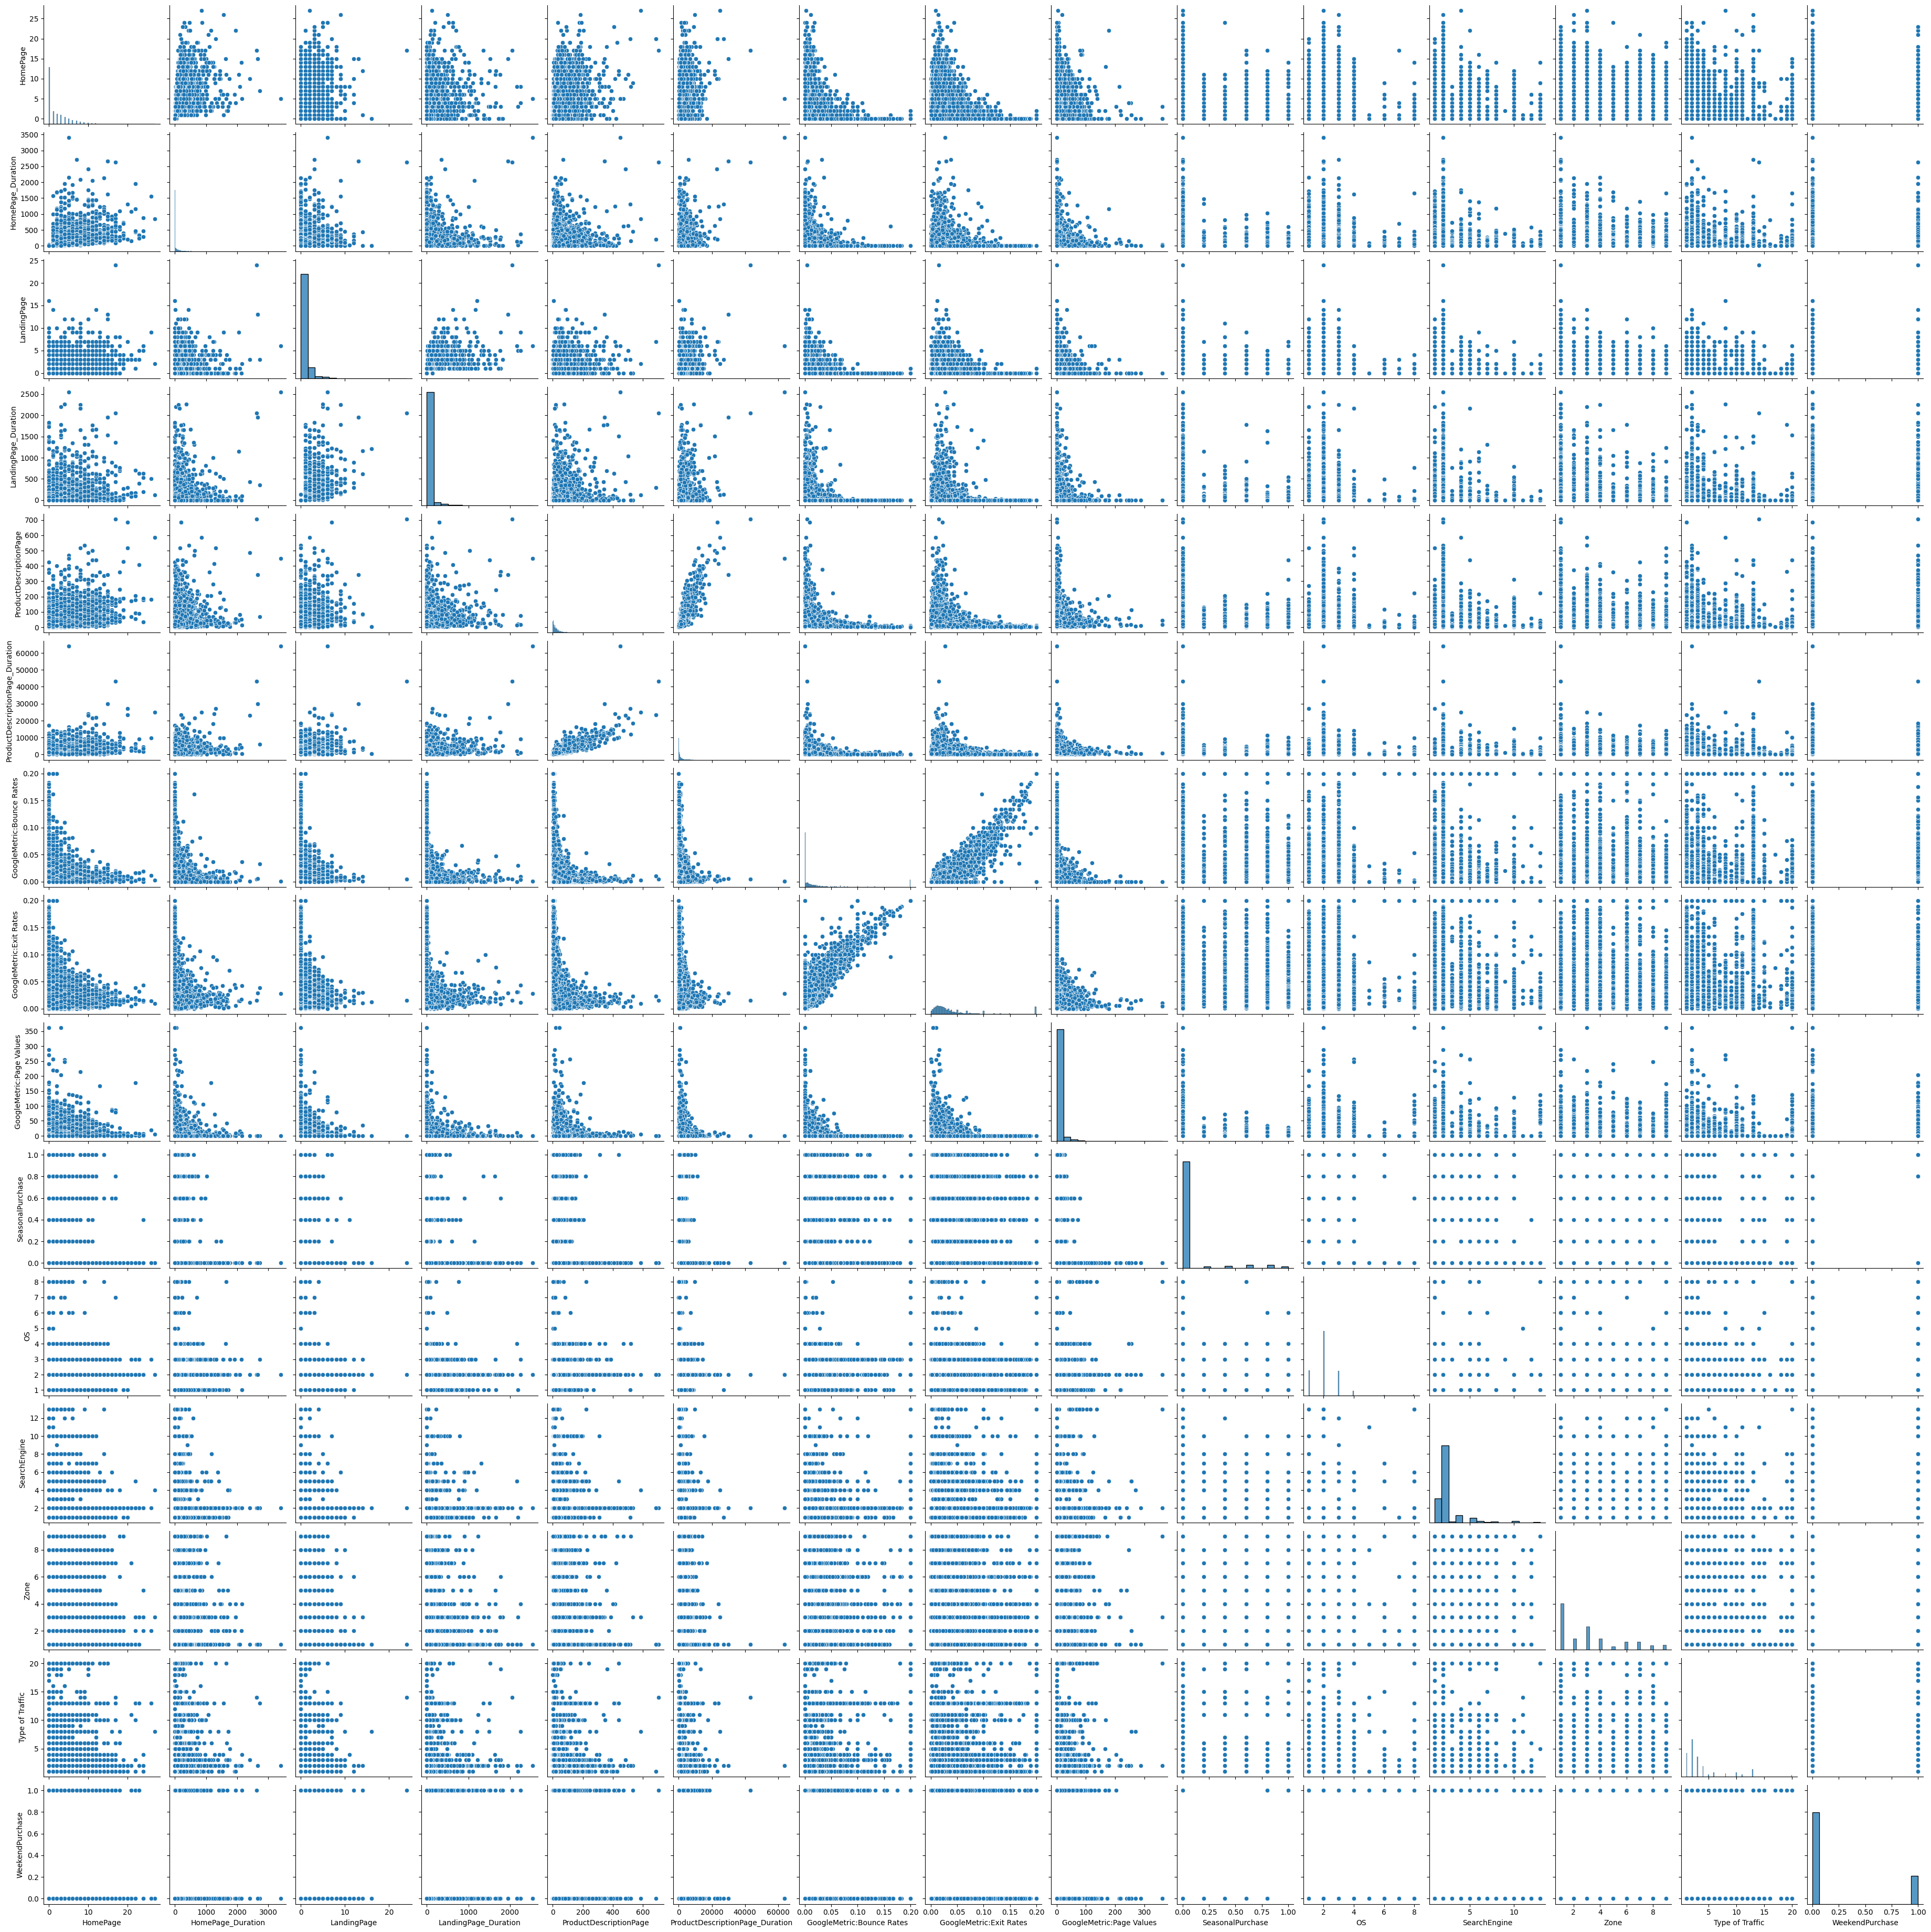

In [13]:
numeric_cols = df.select_dtypes(include=['int', 'float'])
sns.pairplot(numeric_cols)

<ipython-input-14-528e8857111b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Zone'])


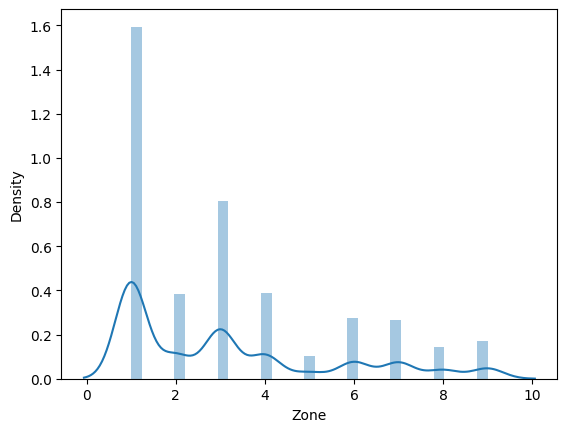

In [14]:
sns.distplot(df['Zone'])
plt.show()


Labels

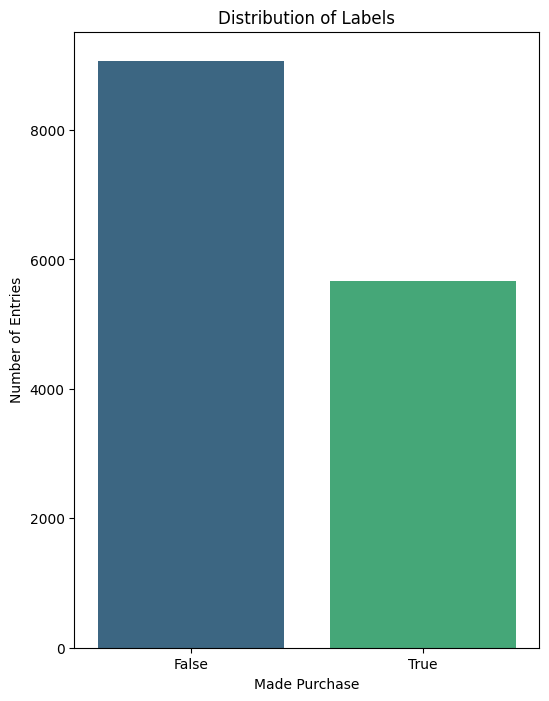

In [15]:
plt.figure(figsize= (6,8))

# plotting the counts of each binary class label
sns.countplot(data= df, x= 'Made_Purchase', palette= 'viridis')

plt.title('Distribution of Labels')
plt.xlabel('Made Purchase')
plt.ylabel('Number of Entries')
plt.show()


# Distribution of categorical features

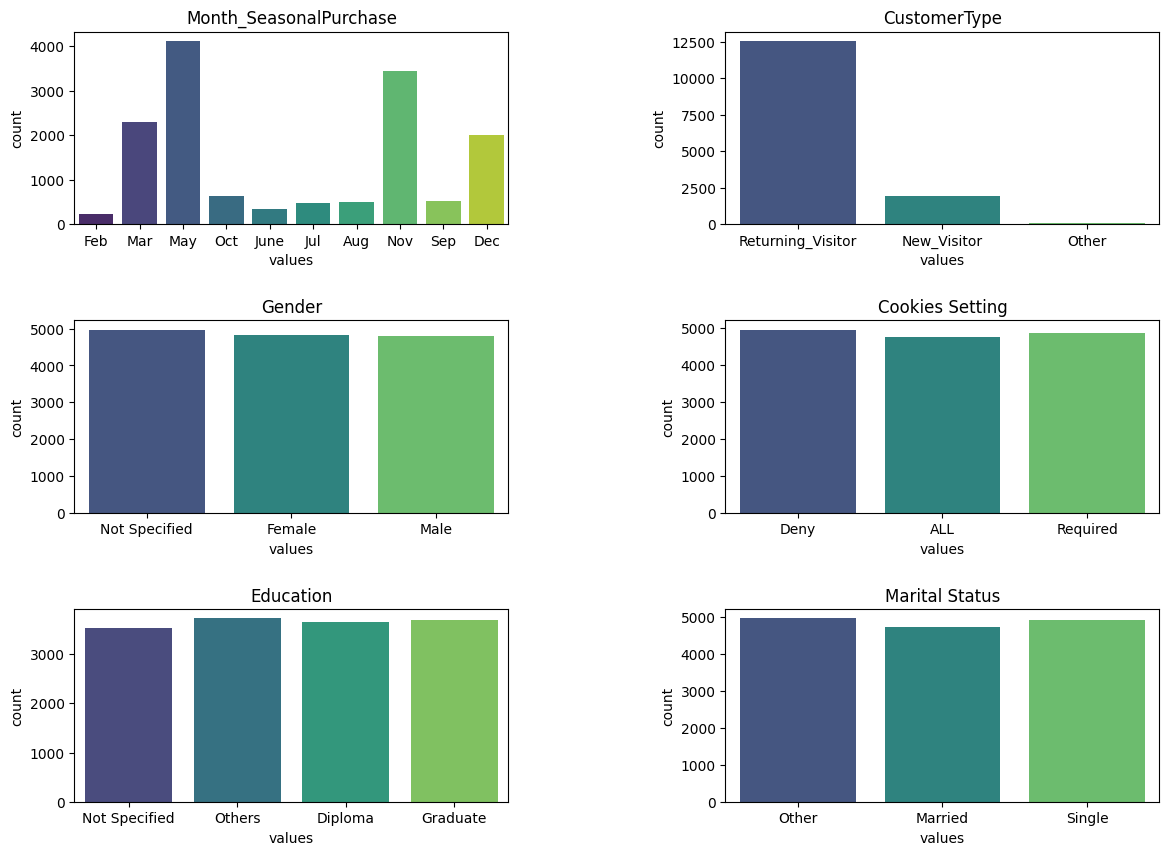

In [16]:
fig = plt.figure(figsize=(14,10))

for i, feature in enumerate(categoric_col):
    ax = plt.subplot(3,2,i+1)
    sns.countplot(data=df, x=feature, palette="viridis", ax=ax)
    plt.xlabel("values")
    plt.title(feature)
plt.subplots_adjust(wspace=0.5, hspace=0.5)   

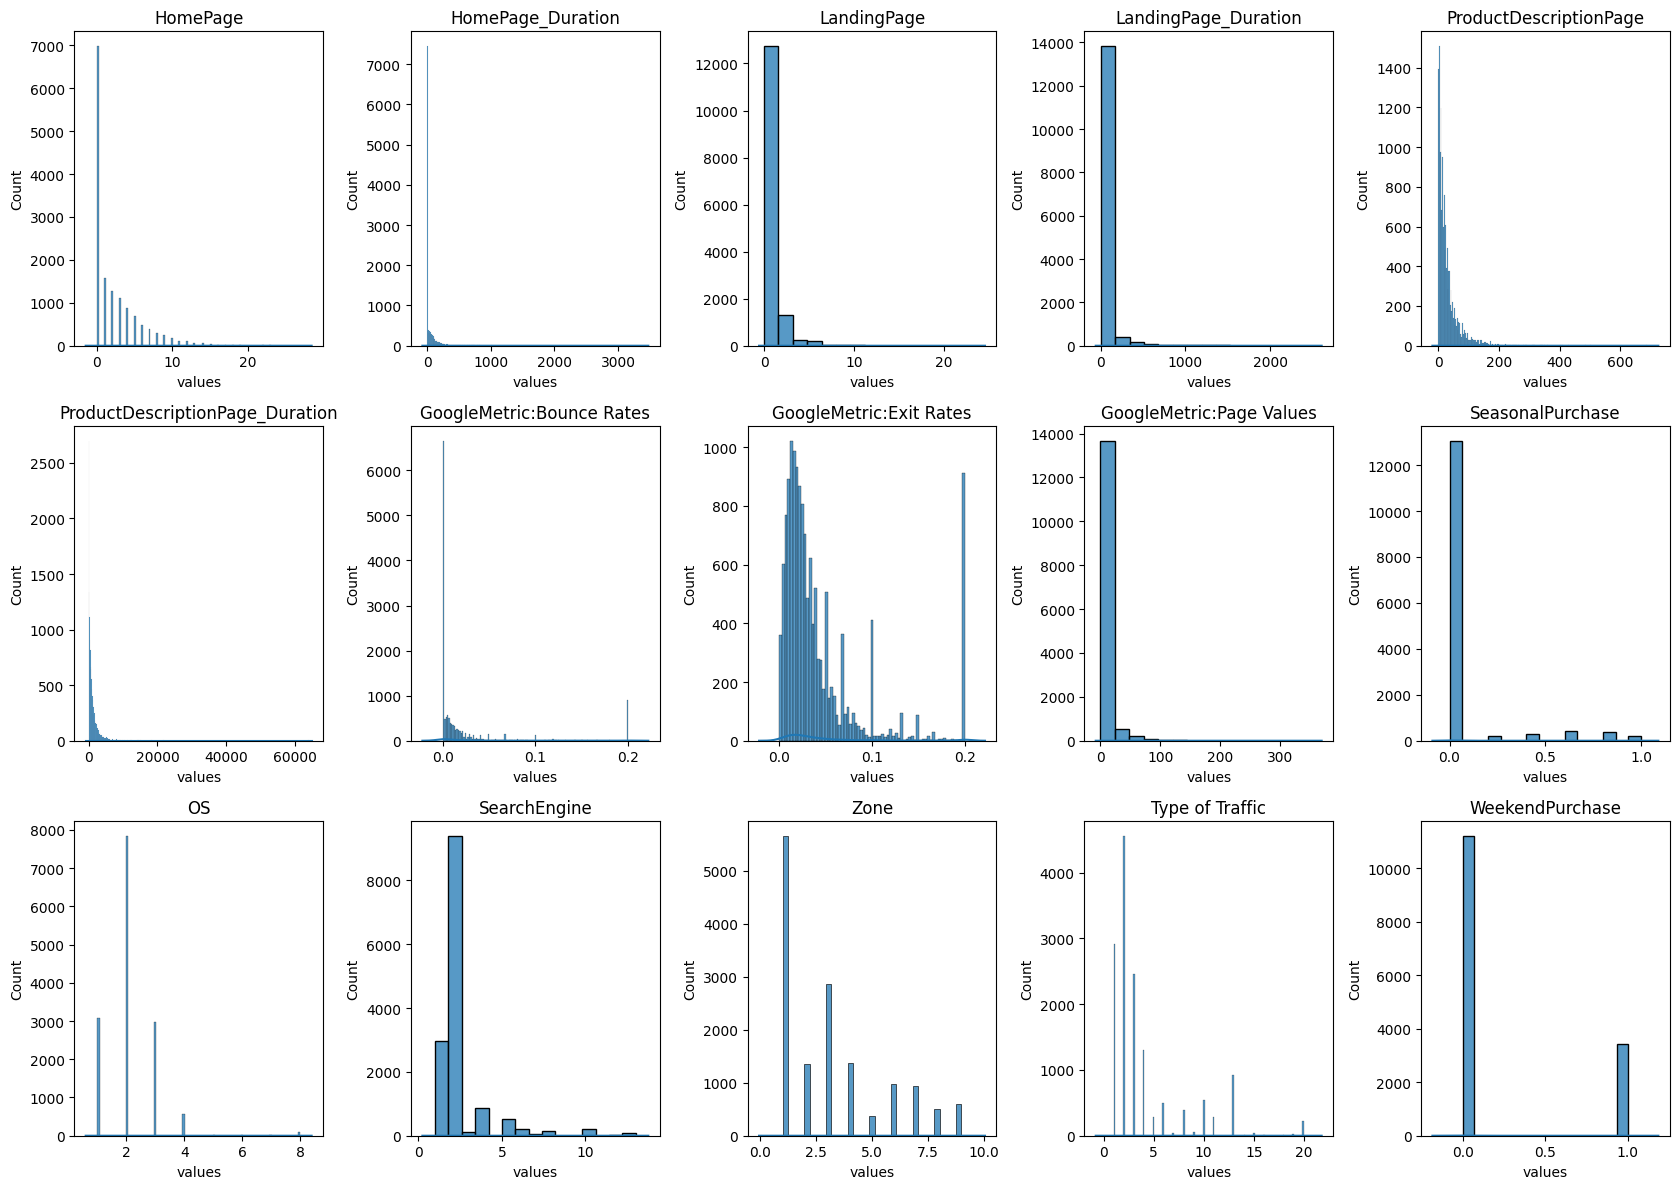

In [17]:
fig = plt.figure(figsize=(17,12))

for i, feature in enumerate(numeric_cols[:-1]):
    ax = plt.subplot(3,5,i+1)
    sns.histplot(data=df, x=feature, ax=ax)
    sns.kdeplot(data=df, x=feature, ax=ax)
    plt.xlabel("values")
    plt.title(feature)
plt.subplots_adjust(wspace=0.5, hspace=0.5)   
plt.tight_layout()
plt.show()

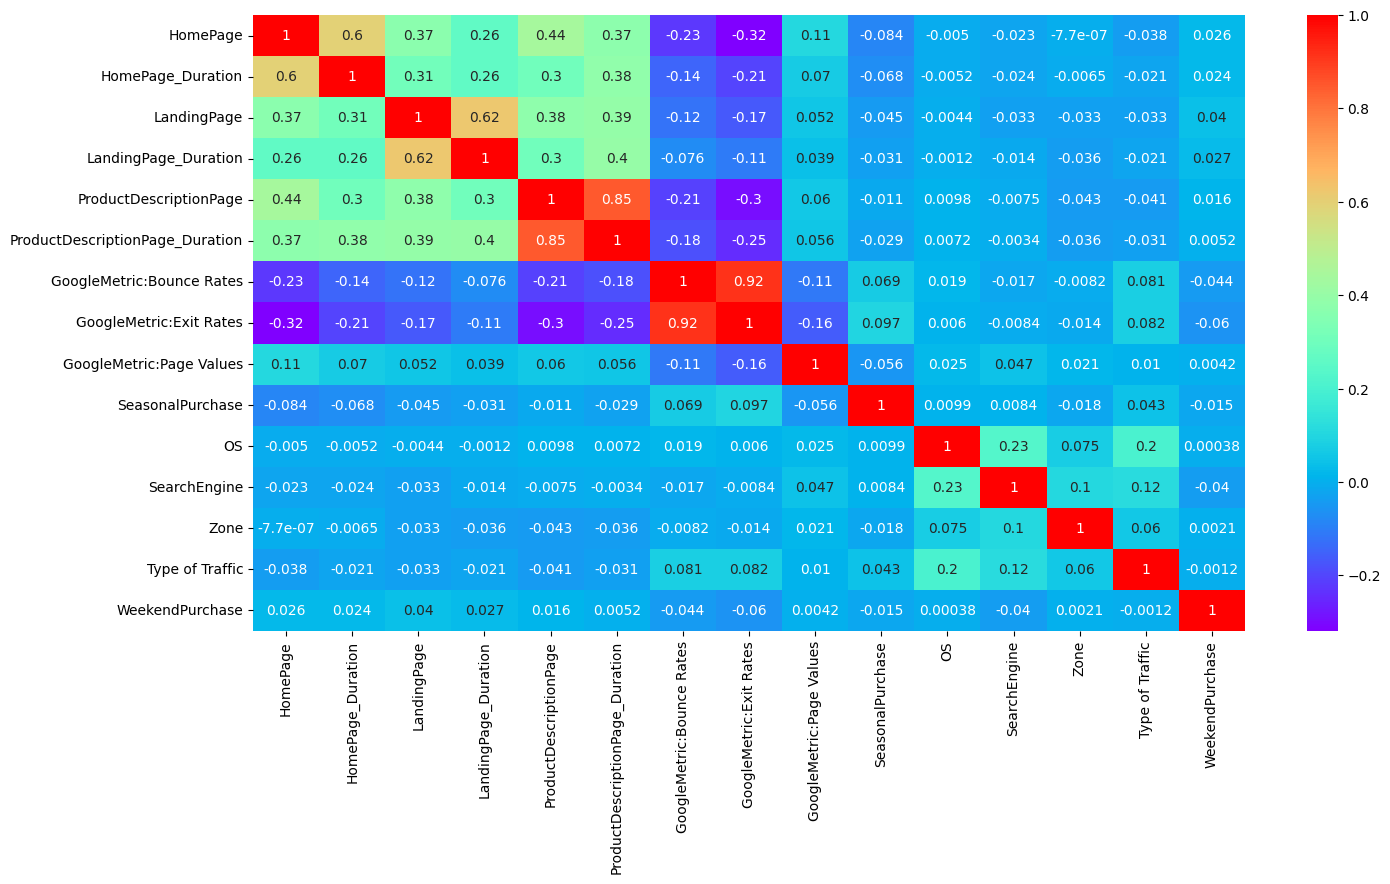

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(numeric_cols.corr(),cmap='rainbow',annot=True)

plt.show()

# Data preprocessing

In [19]:

df.select_dtypes(include=['object']).columns

Index(['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status'],
      dtype='object')

In [20]:
df.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [21]:
df['Month_SeasonalPurchase'].fillna(df['Month_SeasonalPurchase'].mode()[0],inplace=True)
df['CustomerType'].fillna(df['CustomerType'].mode()[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Cookies Setting'].fillna(df['Cookies Setting'].mode()[0],inplace=True)
df['Education'].fillna(df['Education'].mode()[0],inplace=True)
df['Marital Status'].fillna(df['Marital Status'].mode()[0],inplace=True)

In [22]:
df['HomePage'].fillna(df['HomePage'].median(),inplace=True)
df['HomePage_Duration'].fillna(df['HomePage_Duration'].median(),inplace=True)
df['LandingPage'].fillna(0,inplace=True)
df['LandingPage_Duration'].fillna(0,inplace=True)
df['ProductDescriptionPage'].fillna(df['ProductDescriptionPage'].median(),inplace=True)
df['ProductDescriptionPage_Duration'].fillna(df['ProductDescriptionPage_Duration'].median(),inplace=True)
df['GoogleMetric:Bounce Rates'].fillna(0,inplace=True)
df['GoogleMetric:Exit Rates'].fillna(df['GoogleMetric:Exit Rates'].mean(),inplace=True)
df['GoogleMetric:Page Values'].fillna(0,inplace=True)

In [23]:
df['SeasonalPurchase'].fillna(df['SeasonalPurchase'].mode()[0],inplace=True)
df['OS'].fillna(df['OS'].median(),inplace=True)
df['SearchEngine'].fillna(df['SearchEngine'].median(),inplace=True)
df['Zone'].fillna(df['Zone'].median(),inplace=True)
df['Type of Traffic'].fillna(df['Type of Traffic'].median(),inplace=True)
df['WeekendPurchase'].fillna(df['WeekendPurchase'].mode()[0],inplace=True)

In [24]:
df['SeasonalPurchase']=df['SeasonalPurchase'].astype(str)
df['OS']=df['OS'].astype(str)
df['SearchEngine']=df['SearchEngine'].astype(str)
df['Zone']=df['Zone'].astype(str)
df['Type of Traffic']=df['Type of Traffic'].astype(str)
df['WeekendPurchase']=df['WeekendPurchase'].astype(str)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14731 non-null  float64
 1   HomePage_Duration                14731 non-null  float64
 2   LandingPage                      14731 non-null  float64
 3   LandingPage_Duration             14731 non-null  float64
 4   ProductDescriptionPage           14731 non-null  float64
 5   ProductDescriptionPage_Duration  14731 non-null  float64
 6   GoogleMetric:Bounce Rates        14731 non-null  float64
 7   GoogleMetric:Exit Rates          14731 non-null  float64
 8   GoogleMetric:Page Values         14731 non-null  float64
 9   SeasonalPurchase                 14731 non-null  object 
 10  Month_SeasonalPurchase           14731 non-null  object 
 11  OS                               14731 non-null  object 
 12  SearchEngine      

In [26]:
df.isnull().sum()

HomePage                           0
HomePage_Duration                  0
LandingPage                        0
LandingPage_Duration               0
ProductDescriptionPage             0
ProductDescriptionPage_Duration    0
GoogleMetric:Bounce Rates          0
GoogleMetric:Exit Rates            0
GoogleMetric:Page Values           0
SeasonalPurchase                   0
Month_SeasonalPurchase             0
OS                                 0
SearchEngine                       0
Zone                               0
Type of Traffic                    0
CustomerType                       0
Gender                             0
Cookies Setting                    0
Education                          0
Marital Status                     0
WeekendPurchase                    0
Made_Purchase                      0
dtype: int64

In [27]:
X_t=df.drop('Made_Purchase',axis=1)

In [28]:
y=df['Made_Purchase']

In [29]:
numeric_col= X_t.select_dtypes(include=['int', 'float']).columns
print(numeric_col)
categoric_col=X_t.select_dtypes(include=['object']).columns
print(categoric_col)

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values'],
      dtype='object')
Index(['SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')


In [30]:
y.value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

# Applying LabelEncoder on all Categorical columns

In [37]:
X_categoric_col=X_t[categoric_col].apply(LabelEncoder().fit_transform)  
X_categoric_col

,SeasonalPurchase,Month_SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0,2,3,0,8,13,2,2,1,2,1,0
1,0,2,2,5,1,14,2,0,1,3,0,0
2,0,2,2,6,0,14,2,0,0,3,0,1
3,2,2,1,7,2,13,2,1,0,0,2,0
4,0,2,0,5,0,15,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14726,0,7,2,5,5,13,2,0,1,3,0,0
14727,0,6,1,5,1,14,2,2,0,0,0,0
14728,0,0,1,5,3,11,2,2,2,3,2,0
14729,0,5,1,7,3,0,2,2,2,2,0,0


#Removing Categorical columns from X_t table and concatenating X_categorical_col table with new X_t table. save as X_t datafram

In [41]:
X_t.drop(X_categoric_col,axis=1,inplace=True)

In [42]:
X_t

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0
...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0


In [44]:
X_t=pd.concat([X_t, X_categoric_col ], axis=1)
X_t

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0,...,3,0,8,13,2,2,1,2,1,0
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0,...,2,5,1,14,2,0,1,3,0,0
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0,...,2,6,0,14,2,0,0,3,0,1
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,2,...,1,7,2,13,2,1,0,0,2,0
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0,...,0,5,0,15,2,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0,...,2,5,5,13,2,0,1,3,0,0
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0,...,1,5,1,14,2,2,0,0,0,0
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0,...,1,5,3,11,2,2,2,3,2,0
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0,...,1,7,3,0,2,2,2,2,0,0


In [45]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_t,y,test_size=.3,random_state=2048)

In [46]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(10311, 21) (4420, 21) (10311,) (4420,)


In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

In [50]:
categoric_transformer = Pipeline([
    ('scaling', StandardScaler())
])

In [52]:
categoric_col

Index(['SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

In [63]:
preprocessor=ColumnTransformer([
    ('num',numeric_transformer,numeric_col),
    ('cat',categoric_transformer,categoric_col)
],remainder='passthrough')

#Using Logistic Regression after HPT Best Score is 0.65

In [ ]:
# estimator=  LogisticRegression()
# pipe=Pipeline(steps=[
#     ('preposseing',preprocessor),
#     ('selection',SelectKBest(score_func=f_classif,k=10)),
#     ('logistic',estimator)
# ])
# param_grid = {
#     'logistic__penalty': ['l1', 'l2'],
#     'logistic__C': [0.1, 1, 10],
#     'logistic__solver': ['liblinear', 'saga'],
#     'logistic__max_iter': [100, 200, 300],
# }

# grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score: {:.2f}".format(grid_search.best_score_))
# # Best hyperparameters: {'logistic__C': 1, 'logistic__max_iter': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
# # Best score: 0.65

#Using RandomForestClassifier after HPT Best Score is 0.67

In [ ]:
# estimator=  RandomForestClassifier(random_state=42)
# pipe=Pipeline(steps=[
#     ('preposseing',preprocessor),
#     ('kbest', SelectKBest(chi2)),
#     ('rf',estimator)
# ])

# param_grid = {
#     'kbest__k': [2, 4,10],
#     'rf__n_estimators': [50, 100, 200],
#     'rf__max_depth': [3, 5, 7],
#     'rf__min_samples_split': [2, 5],
#     'rf__min_samples_leaf': [1, 2]
# }

# grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# # Best hyperparameters: {'kbest__k': 10, 'rf__max_depth': 7, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
# # Best score: 0.67

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

#StackingClassifier and HPT 

In [64]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('dt', AdaBoostClassifier())
]
estimator= StackingClassifier(estimators=estimators, final_estimator= AdaBoostClassifier())

In [65]:
pipe=Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('transformer',  PowerTransformer()),
    ('estimator', estimator)
])

In [58]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Valu...
                                                  Index(['SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object'))])),
                ('transformer', PowerTransformer()),
                ('estimator',
                 StackingClassifier(estimators=[('rf',
                                                 RandomForestClassifier()),
                                                ('dt', AdaBoostClassifier())],
                                    final_estimator=AdaBoostClassifier()))])

In [59]:
y_pred=pipe.predict(X_val)

In [60]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

       False       0.74      0.85      0.79      2706
        True       0.70      0.54      0.61      1714

    accuracy                           0.73      4420
   macro avg       0.72      0.69      0.70      4420
weighted avg       0.73      0.73      0.72      4420



#Applying HPT on StackingClassifier

In [66]:
param_grid = {
    'transformer__method': ['yeo-johnson', 'box-cox'],
    'estimator__rf__n_estimators': [100, 200, 300],
    'estimator__rf__max_depth': [5, 10, 50, None],
    'estimator__dt__n_estimators': [50, 100, 150],
    'estimator__dt__learning_rate': [0.1, 0.5, 1]
}

In [67]:
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit R...
                                        StackingClassifier(estimators=[('rf',
                                                                        RandomForestClassifier()),
                                                                       ('dt',
                                                                        AdaBoostClassifier())],
                                                           final_estimator=AdaBoostClassifier()))]),
             param_grid={'estimator__dt__learning_rate': [0.1, 0.5, 1],
                         'estimator__dt__n_estimators': [50, 100, 150],
                         'estimator__rf__max_depth': [5, 10, 50, None],
                         'estimator__rf__n_estimators': [100, 200, 300],
                         'transformer__method': ['yeo-johnson', 'box-cox']})

In [68]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best score: {:.2f}".format(grid_search.best_score_))

Best hyperparameters: {'estimator__dt__learning_rate': 1, 'estimator__dt__n_estimators': 50, 'estimator__rf__max_depth': None, 'estimator__rf__n_estimators': 300, 'transformer__method': 'yeo-johnson'}
Best score: 0.72


In [69]:
best_estimator = grid_search.best_estimator_

In [70]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6947599482889918

In [71]:
best_estimator.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Valu...
                                                  Index(['SeasonalPurchase', 'Month_SeasonalPurchase', 'OS', 'SearchEngine',
       'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object'))])),
                ('transformer', PowerTransformer()),


In [72]:
y_pred = best_estimator.predict(X_val)

In [79]:
report = classification_report(y_val, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

       False      0.746     0.866     0.801      2706
        True      0.716     0.534     0.612      1714

    accuracy                          0.737      4420
   macro avg      0.731     0.700     0.706      4420
weighted avg      0.734     0.737     0.728      4420



In [80]:
result=pd.DataFrame(grid_search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__dt__learning_rate,param_estimator__dt__n_estimators,param_estimator__rf__max_depth,param_estimator__rf__n_estimators,param_transformer__method,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.318890,0.618755,0.078359,0.001596,0.1,50,5,100,yeo-johnson,"{'estimator__dt__learning_rate': 0.1, 'estimat...",0.666990,0.646460,0.662464,0.661009,0.664888,0.660362,0.007246,104
1,0.013361,0.000550,0.000000,0.000000,0.1,50,5,100,box-cox,"{'estimator__dt__learning_rate': 0.1, 'estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
2,10.789375,0.396478,0.112207,0.021165,0.1,50,5,200,yeo-johnson,"{'estimator__dt__learning_rate': 0.1, 'estimat...",0.663112,0.651309,0.667798,0.655674,0.666343,0.660847,0.006346,101
3,0.013631,0.001400,0.000000,0.000000,0.1,50,5,200,box-cox,"{'estimator__dt__learning_rate': 0.1, 'estimat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
4,14.750452,0.484887,0.152414,0.030891,0.1,50,5,300,yeo-johnson,"{'estimator__dt__learning_rate': 0.1, 'estimat...",0.662627,0.643550,0.662464,0.659069,0.666343,0.658811,0.007970,108


### Submission Data

In [81]:
test_data=pd.read_csv("/content/test_data_v2.csv")


In [82]:
test_data['Month_SeasonalPurchase'].fillna('May',inplace=True)
test_data['CustomerType'].fillna('Returning_Visitor',inplace=True)
test_data['Gender'].fillna('Not Specified',inplace=True)
test_data['Cookies Setting'].fillna('Deny',inplace=True)
test_data['Education'].fillna('Others',inplace=True)
test_data['Marital Status'].fillna('Other',inplace=True)

In [83]:
test_data['HomePage'].fillna(df['HomePage'].median(),inplace=True)
test_data['HomePage_Duration'].fillna(df['HomePage_Duration'].median(),inplace=True)
test_data['LandingPage'].fillna(0,inplace=True)
test_data['LandingPage_Duration'].fillna(0,inplace=True)
test_data['ProductDescriptionPage'].fillna(df['ProductDescriptionPage'].median(),inplace=True)
test_data['ProductDescriptionPage_Duration'].fillna(df['ProductDescriptionPage_Duration'].median(),inplace=True)
test_data['GoogleMetric:Bounce Rates'].fillna(0,inplace=True)
test_data['GoogleMetric:Exit Rates'].fillna(df['GoogleMetric:Exit Rates'].mean(),inplace=True)
test_data['GoogleMetric:Page Values'].fillna(0,inplace=True)


In [84]:
test_data['SeasonalPurchase'].fillna(df1['SeasonalPurchase'].mode()[0],inplace=True)
test_data['OS'].fillna(df1['OS'].median(),inplace=True)
test_data['SearchEngine'].fillna(df1['SearchEngine'].median(),inplace=True)
test_data['Zone'].fillna(df1['Zone'].median(),inplace=True)
test_data['Type of Traffic'].fillna(df1['Type of Traffic'].median(),inplace=True)
test_data['WeekendPurchase'].fillna(df1['WeekendPurchase'].mode()[0],inplace=True)

In [85]:
test_data['SeasonalPurchase']=test_data['SeasonalPurchase'].astype(str)
test_data['OS']=test_data['OS'].astype(str)
test_data['SearchEngine']=test_data['SearchEngine'].astype(str)
test_data['Zone']=test_data['Zone'].astype(str)
test_data['Type of Traffic']=test_data['Type of Traffic'].astype(str)
test_data['WeekendPurchase']=test_data['WeekendPurchase'].astype(str)

In [87]:
test_data_categorical=test_data[categoric_col].apply(LabelEncoder().fit_transform)  


In [89]:
test_data=test_data.drop(categoric_col,axis=1)

In [92]:
test_data=pd.concat([test_data,test_data_categorical],axis=1)

In [93]:
y_test_pred= best_estimator.predict(test_data)

In [95]:
y_test_pred

array([False, False, False, ..., False, False, False])

In [96]:
 sub=pd.DataFrame( columns=['id','Made_Purchase'])
 sub['id']=[i for i in range(len(y_test_pred))]
 sub['Made_Purchase']=y_test_pred
 sub.to_csv('testoutput11.csv',index=False)